<h1>CS4618: Artificial Intelligence I</h1>
<h1>Prediction</h1>
<h2>
    Derek Bridge<br>
    School of Computer Science and Information Technology<br>
    University College Cork
</h2>

<h1>Initialization</h1>
$\newcommand{\Set}[1]{\{#1\}}$ 
$\newcommand{\Tuple}[1]{\langle#1\rangle}$ 
$\newcommand{\v}[1]{\pmb{#1}}$ 
$\newcommand{\cv}[1]{\begin{bmatrix}#1\end{bmatrix}}$ 
$\newcommand{\rv}[1]{[#1]}$ 
$\DeclareMathOperator{\argmax}{arg\,max}$ 
$\DeclareMathOperator{\argmin}{arg\,min}$ 
$\DeclareMathOperator{\dist}{dist}$
$\DeclareMathOperator{\abs}{abs}$

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h1>Prediction</h1>
<ul>
    <li>We want to create programs that make <b>predictions</b>
        <ul>
            <li>(In everyday use, prediction is about the future; we use the word more generally in AI)</li>
        </ul>
    </li>
    <li>Generically, we refer to such programs as <b>estimators</b></li>
    <li>There are two main types of prediction, and hence two types of estimator:
        <figure>
        <img src="images/15_prediction.png" />
        </figure>
        In both, we are given a vector $\v{x}$ of feature values that describes some object:
        <ul>
            <li>
                <b>Regression</b> means predicting a <b>target value</b>, which is numeric (real-valued)
                <ul>
                    <li>e.g. given a vector of feature values that describe a house, predict the selling price of the house</li>
                </ul>
            </li>
            <li>
                <b>Classification</b> means predicting the object's <b>class</b> from a finite (and usually small) 
                   set of classes
                   <ul>
                       <li>e.g. given a vector of feature values that describe an email, predict whether the email is spam or ham</li>
                   </ul>
            </li>
        </ul>
    </li>
</ul>

<h1>Notation</h1>
<ul>
    <li>We continue to use $\v{x}$ for an object</li>
    <li>We will use $y$ for the target value (in regression) or class label (in classification)
    </li>
    <li>Actually, we will be even more precise:
        <ul>
            <li>We will use $y$ for the <em>actual</em> target value/class label</li>
            <li>We will use $\hat{y}$ for a <em>predicted</em> target value/class label</li>
        </ul>
    </li>
</ul>

<h1>There's more to say about classification</h1>
<ul>
    <li>Classification means predicting an object's class from a finite (and usually small) set of classes
        <ul>
            <li>
                We assume we have a finite set of <b>labels</b>, $\cal{C}$, one per class
            </li>
            <li>
                Given an object $\v{x}$, our task is to assign one of the labels $\hat{y} \in \cal{C}$ to the object.
            </li>
        </ul>
    <li>We will often use integers for the labels
        <ul>
            <li>E.g. given an email, a spam filter predicts $\hat{y} \in \Set{0,1}$, where 0 means ham and  1 means spam
            </li>
            <li>
                But a classifier should not treat these as continuous, e.g. it should never output 0.5
            </li>
            <li>
                Furthermore, where there are more than two labels, we should not assume a relationship
                between the labels
                <ul>
                    <li>Suppose there are three classes $\Set{1,2,3}$</li>
                    <li>Suppose we are classifying object $\v{x}$ and we happen to know that its <em>actual</em> 
                        class label is $y = 3$
                    </li>
                    <li>One classifier predicts $\hat{y} = 1$</li>
                    <li>Another classifier predicts $\hat{y} = 2$</li>
                    <li>Which classifier has done better?</li>
                </ul>
             </li>
         </ul>
     </li>
</ul>

<h2>A variation of classification</h2>
<ul>
    <li>Given an object $\v{x}$, a classifier outputs a label, $\hat{y} \in \cal{C}$</li>
    <li>Instead, a classifer could output a probability distribution over the labels $\cal{C}$
        <ul>
            <li>
                E.g. given an email $\v{x}$, a spam filter might output $\Tuple{0.2, 0.8}$ meaning 
                $P(y = \mathit{ham}\,|\, \v{x}) = 0.2$ and $P(y = \mathit{spam}\,|\, \v{x}) = 0.8$
            </li>
            <li>
                The probabilities must sum to 1.
            </li>
        </ul>
    </li>
    <li>
        We can convert such a classifier into a more traditional one by taking the probability distribution
        and selecting the class with the highest probability:
        $$\arg \max_{\hat{y} \in \cal{C}} P(\hat{y}\,|\, \v{x})$$
    </li>
</ul>

<h2>Types of Classification</h2>
<ul>
    <li>We distinguish two types of classification:
        <ul>
            <li>
                <b>Binary classification</b>, in which there are just two classes, i.e. $|\cal{C}| = 2$, e.g. fail/pass,
                ham/spam, benign/malignant
            </li>
            <li>
                <b>Multiclass classification</b>, where there are more than two classes, i.e. $|\cal{C}| > 2$, e.g. 
                let's say that a post to a forum or discussion board 
                can be a question, an answer, a clarification or an irrelevance
            </li>
        </ul>
    </li>
    <li>In fact, there are even more types of classification, but we will not be studying them further:
        <ul>
            <li>In <b>multilabel classification</b>, the classifier can assign $\v{x}$ to more than one class
                <ul>
                    <li>I.e. it outputs a <em>set</em> of labels, $\hat{y} \subseteq \cal{C}$.
                    </li>
                    <li>E.g. consider a movie classifier where the classes are genres, e.g. $\cal{C} = \Set{\mathit{comedy},
                        \mathit{action}, \mathit{horror}, \mathit{musical}, \mathit{romance}}$. 
                    </li>
                    <li>
                        The classifier's output for <i>The Blues Brothers</i> should be $\Set{\mathit{comedy},
                        \mathit{action}, \mathit{musical}}$.
                    </li>
                </ul>
                Do <strong>not</strong> confuse this with <em>multiclass</em> classification
            </li>
            <li>In <b>ordered classification</b>, there is an <em>ordering</em> defined on the classes
                <ul>
                    <li>The ordering matters in measuring the performance of the classifier</li>
                    <li>E.g. consider a classifier that predicts a student's degree class, i.e. 
                        $\cal{C} = \Set{\mathit{Ordinary}, \mathit{3rd}, \mathit{2ii}, \mathit{2i}, \mathit{1st}}$
                    </li>
                    <li>Suppose for student $\v{x}$, the actual class $y = \mathit{1st}$</li>
                    <li>One classifier predicts $\hat{y} = \mathit{2ii}$</li>
                    <li>Another classifier predicts $\hat{y} = \mathit{2i}$</li>
                    <li>Which classifier has done better?</li>
                </ul>
            </li>
        <ul>
    </li>
</ul>

<h2>We need to say more about binary classification</h2>
<ul>
    <li>In binary classification, there are two classes</li>
    <li>It is common to refer to one class (the one labelled 0) as the <b>negative class</b>
        and the other (the one labelled 1) as the <b>positive class</b>
    </li>
    <li>It doesn't really matter which is which
        <ul>
            <li>But, usually, we treat the class we're trying to identify, or the class that requires special action, 
                as the positive class
            </li>
            <li>E.g. in spam filtering, ham is the negative class; spam is the positive class
            </li>
            <li>
                What about tumour classification?
            </li>
        </ul>
    </li>
    <li>(This terminology is extended to other things too, e.g. we can refer to <b>negative examples</b> and
        <b>positive examples</b>)
    </li>
</ul>

<h1>Class exercises</h1>
<img style="float: right" src="images/15_snow.jpg" />
<ul>
    <li>Consider:
        <ul>
            <li>Predicting tomorrow's rainfall</li>
            <li>Predicting whether we will have a white Christmas</li>
            <li>Predicting the sentiment of a tweet (negative, neutral or positive)</li>
            <li>Predicting a person's sexual orientation</li>
            <li>Predicting a person's opinion of a movie on a rating scale of 1 star (rotten) to 5 stars (fab)</li>
        </ul>
    </li>
    <li>Answer the following:
        <ul>
            <li>Which are regression and which classification?</li>
            <li>If classification, which are binary and which are multiclass?</li>
            <li>If binary, which is the positive class and which the negative?</li>
        </ul>
    </li>
    <li>Clustering and classification are easily confused: in both, we 'assign objects to groups'<br />
        What is the <em>key</em> difference between them?
    </li>
</ul>

<h1>Building a model: ask an expert</h1>
<ul>
    <li>So how, for example, do we build a regression system that can predict the selling price of your house?</li>
    <li>We ask Ann
        <ul>
            <li>She's an auctioneer &mdash; an expert at predicting Cork city house prices</li>
            <li>But we don't ask her to predict your house price</li>
            <li>We ask her for a <em>general</em> method for predicting Cork house prices</li>
        </ul>
    </li>
    <li>She tells us that her rule-of-thumb is that prices start at 25k&euro; and increase by 1.5k&euro; for every 
        extra square metre of floor area:
        $$y = 25 + 1.5\mathit{flarea}$$
        <ul>
            <li>So, she predicts your house (floor area of 114 square metres) will sell for 
                $\hat{y} = 25 + 1.5 \times 114 = 196$k&euro;
            </li>
        </ul>
    </li>
</ul>

<h2>Models</h2>
<ul>
    <li>Ann has given us a <b>model</b></li>
    <li>
        In very abstract terms, a model is an approximation of some part of reality that enables us to make 
        predictions about that reality
    </li>
    <li>
        In very concrete terms for this module, a model is a formula (or function or procedure or set of rules&hellip;) 
        that expresses the relationship between the the thing being predicted (target value or class) and the features
    </li>
    <li>(It so happens that Ann's is a <b>linear model</b> &mdash; see future lecture)
</ul>

In [3]:
# Ann's model
def f_ann(flarea):
    return 25 + 1.5 * flarea

In [4]:
# Predicting the selling price of your house
f_ann(114)

196.0

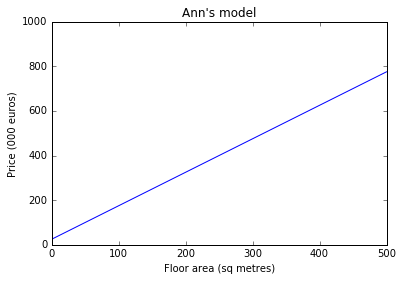

In [5]:
# Plotting the predictions made by Ann's model
fig = plt.figure()
plt.title("Ann's model")
xvals = np.linspace(0, 500, 2)
plt.plot(xvals, f_ann(xvals))
plt.xlabel("Floor area (sq metres)")
plt.xlim(0, 500)
plt.ylabel("Price (000 euros)")
plt.ylim(0, 1000)
plt.show()

<h2>Ben's Model</h2>
<ul>
    <li>We might also ask Ben, another Cork auctioneer, and he might give us a different model, e.g. 
        $$y = 20 + 50\mathit{bdrms} + 10\mathit{bdrms}^2$$
    </li>
    <li>(Ben' model is not a linear model &mdash; see future lecture)
</ul>

In [6]:
# Ben's model
def f_ben(bdrms):
    return 20 + 50 * bdrms + 10 * bdrms ** 2

In [7]:
# Predicting the selling price of your house
f_ben(3)

260

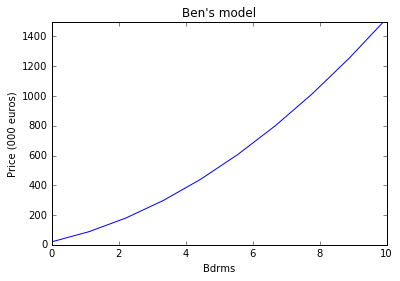

In [8]:
# Plotting the predictions made by Ben's model
fig = plt.figure()
plt.title("Ben's model")
xvals = np.linspace(0, 10, 10)
plt.plot(xvals, f_ben(xvals))
plt.xlabel("Bdrms")
plt.xlim(0, 10)
plt.ylabel("Price (000 euros)")
plt.ylim(0, 1500)
plt.show()

<h2>Which Model is Better?</h2>
<ul>
    <li>
        Ann's and Ben's models make different predictions
        <ul>
            <li>
                Ann predicts your house will sell for $y = 25 + 1.5 \times 114 = 196$k&euro;
            </li>
            <li>
                Ben predicts your house will sell for $y = 20 + 50 \times 3 + 10 \times 3^2 = 260$k&euro;
            </li>
        </ul>
    </li>
    <li>
        So we might ask: which is better?
        <ul>
            <li>
                A complicated question &mdash; to be explored in this module and the next module
            </li>
            <li>
                For now, suppose your house sells for 210000&euro;. Ann's prediction (196000&euro;) is closer 
                than Ben's (260000&euro;), so we have some evidence that Ann's model is better
            </li>
        </ul>
    </li>
</ul>

<h1>Building a model: learn from data</h1>
<ul>
    <li>Rather than ask an expert, we want to <b>learn</b> a model from data</li>
    <li>Suppose we collect a dataset of <b>labeled examples</b>
        <ul>
            <li>
                Each example describes a house by giving values for the various features
            </li>
            <li>
                But now, also, each example gives the <em>actual</em> selling price of the house
            </li>
        </ul>
    </li>
    <li>
        We take some or all of these examples, call them the <b>training set</b>, and give them to the learning 
        algorithm
    </li>
    <li>As best it can, the learning algorithm finds a model based on the labeled examples in the training set
    </li>
</ul>

<h1>Datasets of labeled examples</h1>
<ul>
    <li>As before: $m$ examples, $n$ features</li>
    <li>But a <b>labeled example</b> is a <em>pair</em>, comprising a vector of feature values and the value of 
        the target (regression) or the class label (classification)
        $$\Tuple{\v{x}, y}$$
    </li>
    <li>So a <b>labeled dataset</b> looks like this: 
        $$\Set{\Tuple{\v{x}^{(1)}, y^{(1)}}, \Tuple{\v{x}^{(2)}, y^{(2)}}, \ldots, 
        \Tuple{\v{x}^{(m)}, y^{(m)}}}$$
        <ul>
            <li>E.g. regression: features are floor area, bedrooms and bathrooms; target is selling price
                (thousands of &euro;)
                $$\Set{\Tuple{\cv{92.9\\3\\2}, 175},\,\, \Tuple{\cv{171.9\\4\\3}, 435},\,\, \Tuple{\cv{79\\3\\1}, 85}\cdots}$$
            </li>
            <li>E.g. classification: features are lecture and lab attendance (%) and CAO points; class labels are 0 = pass, 1 = fail
                $$\Set{\Tuple{\cv{60\\45\\500}, 1},\,\, \Tuple{\cv{20\\80\\350}, 0},\,\, \Tuple{\cv{90\\70\\400}, 0}\cdots}$$
            </li>
        </ul>
    </li>
    <li>From a labeled datset, we can construct a matrix $\v{X}$ <em>and</em> a vector $\v{y}$ as follows:
        $$\v{X} = \begin{bmatrix}
              \v{x}_1^{(1)} & \v{x}_2^{(1)} & \ldots & \v{x}_n^{(1)} \\
              \v{x}_1^{(2)} & \v{x}_2^{(2)} & \ldots & \v{x}_n^{(2)} \\
              \vdots        & \vdots        & \vdots & \vdots \\
              \v{x}_1^{(m)} & \v{x}_2^{(m)} & \ldots & \v{x}_n^{(m)} \\
              \end{bmatrix}\,\,\,\,\,
          \v{y} = \cv{y^{(1)}\\ y^{(2)}\\ \vdots\\ y^{(m)}}
        $$
        <ul>
            <li>In the matrix rows are examples, columns are features</li>
            <li>The vector gives corresponding target values/class labels</li>
            <li>E.g
                $$\v{X} = 
                    \begin{bmatrix}
                        92.9 & 3 & 2 \\
                        171.9 & 4 & 3 \\
                        79 & 3 & 1
                    \end{bmatrix}\,\,\,\,\,
                  \v{y} = \cv{175\\ 435\\ 85}
                $$
            </li>
            <li>E.g.
                $$\v{X} = 
                    \begin{bmatrix}
                        60 & 45 & 500 \\
                        20 & 80 & 350 \\
                        90 & 70 & 400
                    \end{bmatrix}\,\,\,\,\,
                  \v{y} = \cv{1\\ 0\\ 0}
                $$
            </li>
        </ul>
    </li>
</ul>

<h2>Learning from data</h2>
<figure>
    <img src="images/15_learning.png" />
</figure>

<h3>Terminology</h3>
<ul>
    <li>
        We will say that the algorithm <b>learns</b> a model
    </li>
    <li>
        We could also say that we are <b>training</b> the algorithm on the data
    <li>
        We could also say that the algorithm <b>fits</b> a model to the training set
    </li>
    <li>
        We could also call it <b>function approximation</b>
    </li>
</ul>

<h1>Types of Learning in AI</h1>
<ul>
    <li><b>Reinforcement learning</b>:
        <ul>
            <li>The agent receives rewards (or punishments) after executing actions</li>
            <li>The rewards (or punishments) act as positive (or negative) reinforcement</li>
            <li>The agent learns a policy that defines which actions to perform in which situations to
                maximize reward over time
            </li>
        </ul>
    </li>
    <li><b>Unsupervised learning</b>:
        <ul>
            <li>The agent learns from an unlabeled dataset</li>
            <li>The goal is to find structure within the dataset</li>
            <li>Clustering and most forms of dimensionality reduction are examples of unsupervised
                learning but there are other examples of unsupervised learning (not covered) such as anomaly detection and
                association rule mining
            </li>
        </ul>
    </li>
    <li><b>Supervised learning</b>:
        <ul>
            <li>The agent learns from a labeled dataset</li>
            <li>The goal is to generalise from the labeled dataset to learn how to predict 
                target values/class labels when given feature values
            </li>
            <li>Learning models for regression and classification are examples of supervised learning</li>
        </ul>
    </li>
    <li><b>Semisupervised learning</b>:
        <ul>
            <li>The agent learns from a dataset, only a (small) subset of which is labeled</li>
            <li>The goal is usually the same as in supervised learning but making use of the
                unlabeled data to compensate for the low volume of labeled data
            </li>
        </ul>
    </li>
</ul>